In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Data
data = {
    'Number UEs': ['16', '32', '64', '128', '256', '512', '1024'],
    'E2Nodes ON': [1, 1, 1, 2, 5, 9, 17],
    'E2Nodes OFF':[16, 16, 16, 15, 12, 8, 0],
    'Max CPU (millicores)': [0.0881, 0.013, 0.477, 0.938, 2.375, 4.275, 8.0757],
    'Std Dev CPU': [0.0324, 0.017, 0.186, 0.469, 0.703, 0.532, 2.26],  
    'Std Dev CPU': [0.011, 0.002, 0.096, 0.14, 0.38, 0.57, 1.52],
    'Max Memory (MB)': [45.5, 58.1, 107.83, 214.7, 366.77, 626.59, 1070.58],
    'Std Dev Memory': [3.2, 6, 8.5, 15, 25, 50, 90],
    'Time to solve (s)': [1.56, 2.55, 6.42, 20.24, 49.26, 119.95, 292.04],
    'Std Dev Time': [0.39, 0.38, 1.29, 3.24, 8.37, 14.39, 73.01]
}

df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="darkgrid")

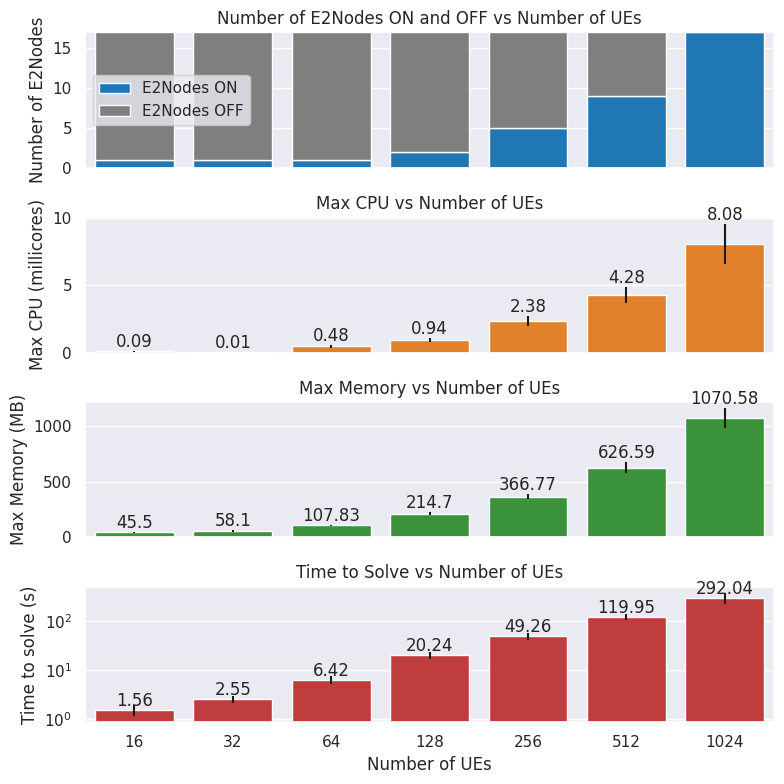

In [3]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

# Stacked bar plot for E2nodes ON and OFF vs Number UEs
axs[0].bar(df['Number UEs'], df['E2Nodes ON'], label='E2Nodes ON', color='tab:blue')
axs[0].bar(df['Number UEs'], df['E2Nodes OFF'], bottom=df['E2Nodes ON'], label='E2Nodes OFF', color='tab:grey')

axs[0].set_title('Number of E2Nodes ON and OFF vs Number of UEs')
axs[0].set_ylabel('Number of E2Nodes')
axs[0].legend(loc='center left')

# Line plot for Max CPU vs Number UEs
sns.barplot(x='Number UEs', y='Max CPU (millicores)', yerr=df['Std Dev CPU'], data=df, ax=axs[1], color='tab:orange')
axs[1].set_title('Max CPU vs Number of UEs')
axs[1].set_xlabel('Number of UEs')
axs[1].set_ylabel('Max CPU (millicores)')
#axs[1].set_yscale('log')

# Annotate the values of each bar
for i, v in enumerate(df['Max CPU (millicores)']):
    axs[1].annotate(str(round(v, 2)), (df['Number UEs'][i], v + df['Std Dev CPU'][i] + 0.0001), ha='center', va='bottom')

# Line plot for Max Memory vs Number UEs
sns.barplot(x='Number UEs', y='Max Memory (MB)', yerr=df['Std Dev Memory'], data=df, ax=axs[2], color='tab:green')
axs[2].set_title('Max Memory vs Number of UEs')
axs[2].set_xlabel('Number of UEs')
axs[2].set_ylabel('Max Memory (MB)')

# Annotate the values of each bar
for i, v in enumerate(df['Max Memory (MB)']):
    axs[2].annotate(str(round(v, 2)), (df['Number UEs'][i], v + df['Std Dev Memory'][i] + 0.0001), ha='center', va='bottom')

# Line plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs', y='Time to solve (s)', yerr=df['Std Dev Time'], data=df, ax=axs[3], color='tab:red')
axs[3].set_title('Time to Solve vs Number of UEs')
axs[3].set_xlabel('Number of UEs')
axs[3].set_ylabel('Time to solve (s)')
axs[3].set_yscale('log')

# Annotate the values of each bar
for i, v in enumerate(df['Time to solve (s)']):
    axs[3].annotate(str(round(v, 2)), (df['Number UEs'][i], v), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/rApp-energy-saver.png', bbox_inches='tight')
plt.savefig('out/rApp-energy-saver.pdf', dpi=300, bbox_inches='tight')